<a href="https://colab.research.google.com/github/rmontteiro/ML_IGTI_bootcamp/blob/master/Desafio_Mod3_RegLinear_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos
import seaborn as sns
import datetime

In [104]:
#importando o nosso dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes_numeric.csv to diabetes_numeric (2).csv


In [105]:
df = pd.read_csv('diabetes_numeric.csv')

In [106]:
df.head()

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [107]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (43, 3)


In [108]:
# Verificando quais são os tipos das features
df.columns

Index(['age', 'deficit', 'c_peptide'], dtype='object')

In [109]:
#verificando o formato do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


In [110]:
#contando valores nulos 
df.isnull().sum()

age          0
deficit      0
c_peptide    0
dtype: int64

In [112]:
df['age'].value_counts()

5.2     2
4.8     2
11.1    2
13.2    2
7.9     2
10.6    2
10.8    1
11.3    1
0.9     1
12.5    1
9.8     1
8.1     1
8.8     1
11.0    1
15.5    1
1.8     1
14.5    1
1.0     1
8.5     1
11.5    1
12.7    1
12.8    1
1.9     1
5.1     1
11.9    1
4.2     1
6.9     1
11.8    1
12.4    1
9.9     1
13.8    1
15.6    1
2.2     1
5.8     1
10.4    1
8.9     1
10.5    1
Name: age, dtype: int64

In [113]:
# Analisando o resumo da base
df.describe()

,age,deficit,c_peptide
count,43.000000,43.000000,43.000000
mean,9.032558,-8.148837,4.746512
std,4.022539,7.123080,0.720565
min,0.900000,-29.000000,3.000000
25%,5.500000,-12.700000,4.450000
50%,10.400000,-7.800000,4.900000
75%,11.850000,-2.000000,5.100000
max,15.600000,-0.200000,6.600000


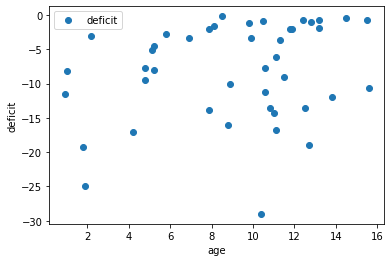

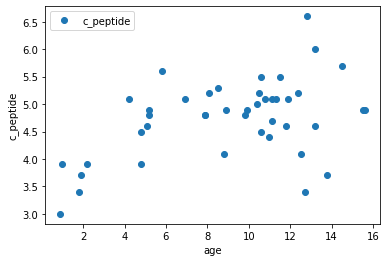

In [115]:
#plotando gráficos de correlação das features
for i in df.columns[0:]:
    if(i != 'age'):
        df.plot(x = 'age', y = i, style='o') 
        plt.xlabel('age')  
        plt.ylabel(i) 
        plt.show()

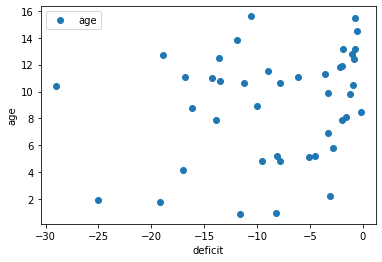

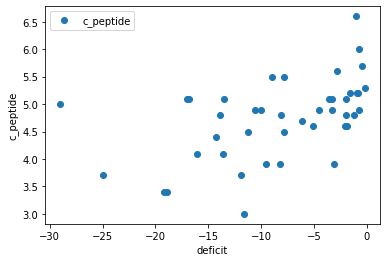

In [117]:
#plotando gráficos de correlação das features
for i in df.columns[0:]:
    if(i != 'deficit'):
        df.plot(x = 'deficit', y = i, style='o') 
        plt.xlabel('deficit')  
        plt.ylabel(i) 
        plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot para a exima C_pepitida')

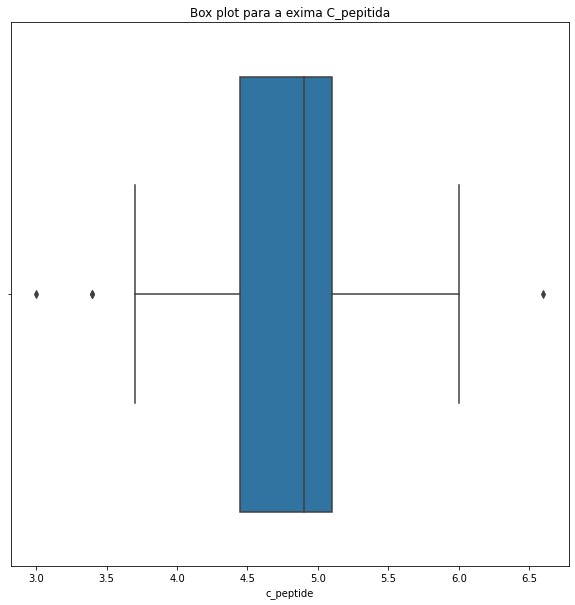

In [118]:
#verificando se existem outliers
plt.figure(figsize=(10, 10))
g = sns.boxplot(df['c_peptide'])  #realiza o plot através da biblioteca seaborn
g.set_title('Box plot para a exima C_pepitida')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot para deficit')

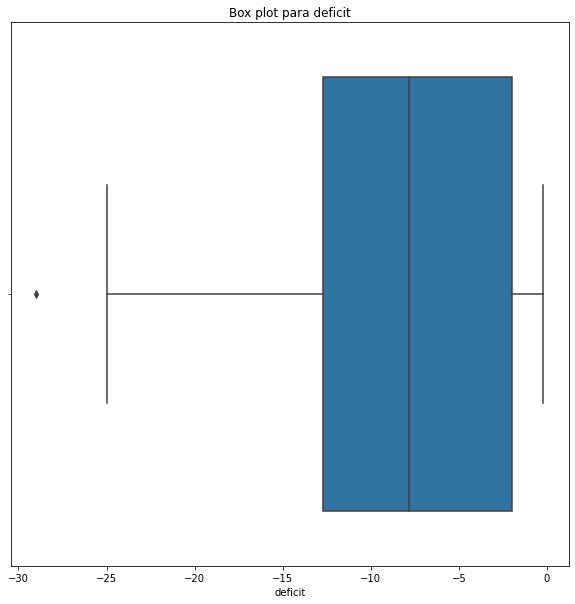

In [119]:
#verificando se existem outliers
plt.figure(figsize=(10, 10))
g = sns.boxplot(df['deficit'])  #realiza o plot através da biblioteca seaborn
g.set_title('Box plot para deficit')

In [121]:
# armazenando os labels em um array
labels = np.array(df['age'])

# salvando a ordem das features
feature_list = list(df.columns)

In [122]:
# removendo a coluna de labels do df original
df2 = df.drop('age', axis = 1)

# check
df2.columns

Index(['deficit', 'c_peptide'], dtype='object')

In [126]:
# convertendo df para array
data = np.array(df2)

In [127]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [134]:
# importar o modelo de regressão linear
from sklearn.linear_model import LinearRegression 

# treinando o modelo no conjunto de dados de treino
regression = LinearRegression().fit(train_data, train_labels);

In [135]:
# aplicando o modelo treinado para a previsão  
#em todo o conjunto de teste
predictions1_labels = regression.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions1_labels})  
p.head(10)

,Real,Previsto
0,13.2,13.216094
1,14.5,12.298266
2,11.9,10.336128
3,6.9,10.249587
4,4.8,6.112287
5,12.5,6.460112
6,10.4,8.228363
7,7.9,8.612805
8,5.8,11.834775
9,10.6,11.191546


In [136]:
print('R2:', metrics.r2_score(test_labels, predictions1_labels)) 
print('MSE:', metrics.mean_squared_error(test_labels, predictions1_labels))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions1_labels))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test_labels, predictions1_labels))) 
print('MAE:', metrics.mean_absolute_error(test_labels, predictions1_labels))
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions1_labels))

R2: -0.6447244705012374
MSE: 15.958177048412086
RMSE: 3.994768710252458
RMSLE: 0.4325175208905911
MAE: 2.9781452201526304
MAPE: 32.83657810762598
